# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [1]:
# Import libraries and modules.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.formula.api import ols

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

* To work with clean, high-quality, error free data.
* To discover what variables are in the dataset.
* To discover the distribution of features such as mean, median, standard deviation, min/max, quartiles.
* To decide which are independent variables and which is the dependent variable by plotting linear relationship.

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

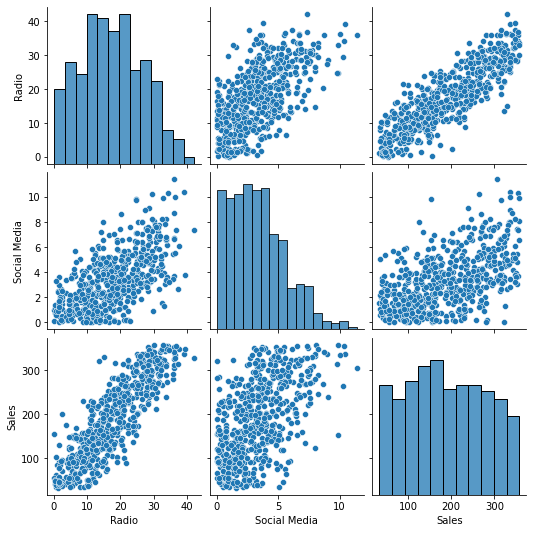

In [3]:
# Create a pairplot of the data.

sns.pairplot(data)
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



Radio has the strongest linear relationship with Sales.  Social Media sort of does. TV and Influencer were not plotted because they aren't numeric.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [4]:
# Calculate the mean sales for each TV category. 

print(data.groupby(['TV'])['Sales'].mean())

print()

# Calculate the mean sales for each Influencer category. 

print(data.groupby(['Influencer'])['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



The categorical variables have numeric mean values based on which tier is chosen.

TV can be broken up into:  
- High ~301
- Medium ~195
- Low ~91

There are clear thresholds for each tier so TV might be a strong predictor of Sales.

Influencer can be broken up into:  
- Mega ~194
- Macro ~182
- Micro ~188
- Nano ~191

All 4 tiers have similar values so Influencer might be a weak predictor of Sales.

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [5]:
# Drop rows that contain missing data and update the DataFrame.

print('Number of rows with missing data: ', data.isna().any(axis=1).sum())
print()
print('Rows with missing data:')
print(data[data.isna().any(axis=1)])

data_clean = data.dropna().reset_index(drop=True)

print()
print('Clean data:')
print(data_clean[data_clean.isna().any(axis=1)])

Number of rows with missing data:  0

Rows with missing data:
Empty DataFrame
Columns: [TV, Radio, Social Media, Influencer, Sales]
Index: []

Clean data:
Empty DataFrame
Columns: [TV, Radio, Social Media, Influencer, Sales]
Index: []


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [6]:
# Rename all columns in data that contain a space. 

data_clean = data_clean.rename(columns={'Social Media': 'Social_Media'})

data_clean.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [7]:
# Define the OLS formula.

ols_formula = 'Sales ~ Radio + C(TV)'


# Create an OLS model.

OLS = ols(formula=ols_formula, data=data_clean)


# Fit the model.

model = OLS.fit()


# Save the results summary.

model_summary = model.summary()


# Display the model results.

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.63e-288
Time:                        16:05:06   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



I chose TV and Radio:
1. TV because the breakdown of the tiers had noticeable thresholds that were significant.
2. Radio because the scatterplot showed it being more linear than compared to Social_Media.

Influencer's differences weren't significant enough to be considered and it didn't have any relationship with Sales.

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

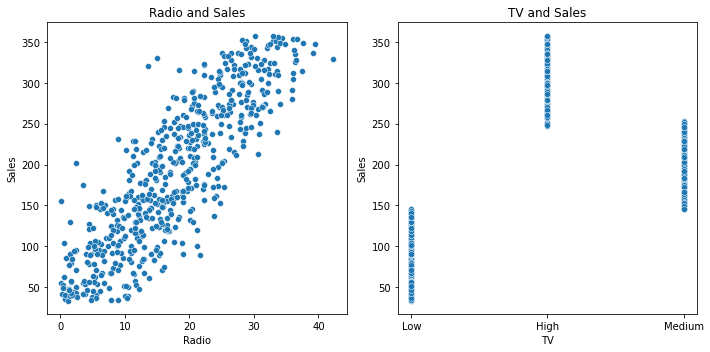

In [8]:
# Create a scatterplot for each independent variable and the dependent variable.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.scatterplot(x=data_clean['Radio'], y=data_clean['Sales'], ax=axes[0])
axes[0].set_title('Radio and Sales')

sns.scatterplot(x=data_clean['TV'], y=data_clean['Sales'], ax=axes[1])
axes[1].set_title('TV and Sales')

plt.tight_layout()
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


Linearity is met with Radio and Sales. TV and Sales have distince thresholds that increase in order of low, medium, then high.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

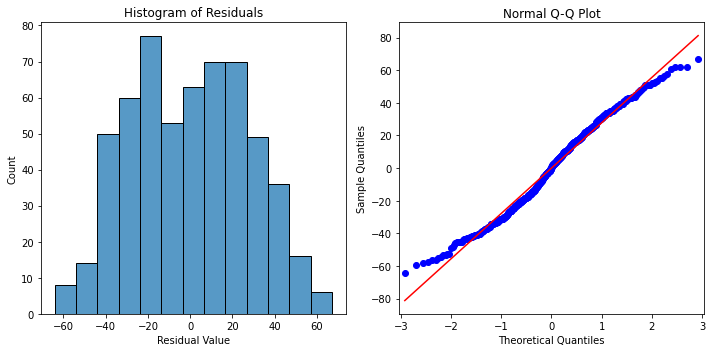

In [9]:
# Calculate the residuals.

residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Create a histogram with the residuals. 

sns.histplot(residuals, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residual Value')

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Normal Q-Q Plot')

plt.tight_layout()
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



The histrogram of residuals show a normal distribution and the residuals in the normal Q-Q Plot form a straight line. Both support the normality assumption.

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

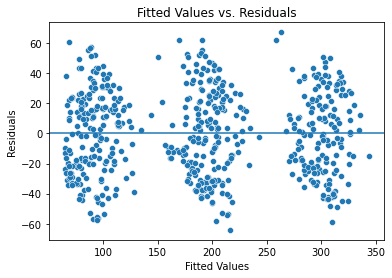

In [10]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x=model.fittedvalues, y=residuals)
fig.set_title('Fitted Values vs. Residuals')
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




There are 3 clusters of points because TV is the biggest factor that affects Sales.

There are no patterns within the 3 clusters so homoscedasticity is met.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

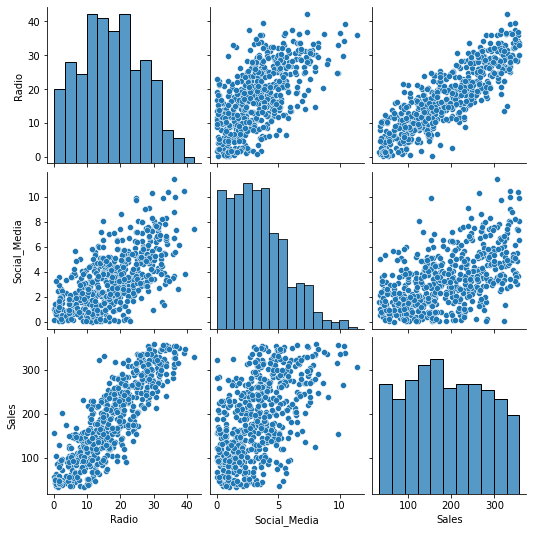

In [11]:
# Create a pairplot of the data.

sns.pairplot(data_clean)
plt.show()

In [12]:
# Calculate the variance inflation factor (optional).

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data_clean[['Radio', 'TV']]

# Encode the categorical variable TV so it is able to be used to determine VIF
X['TV'] = X['TV'].map({'Low':0, 'Medium':1, 'High': 2})

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,6.26696
TV,6.26696


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?

The VIF for Radio and TV is 6.26696, which is higher than the 5, thus there is collinearity between the two independent variables. This violates the multicollinearity assumption.

## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [13]:
# Display the model results summary.

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.63e-288
Time:                        16:05:06   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?


With TV and Radio as the independent variables, the R<sup>2</sup> is 0.904 which means the model explains 90.4% of the variation in Sales.

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [14]:
# Display the model results summary.

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.63e-288
Time:                        16:05:06   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What are the model coefficients?



Intercept (B<sub>0</sub>) = 218.5261  
TV Low (B<sub>TV_Low</sub>) = -154.2971  
TV Medium (B<sub>TV_Medium</sub>) = -75.3120  
Radio = 2.9669

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



y = B<sub>0</sub> + (B<sub>1</sub> * X<sub>1</sub>) + (B<sub>2</sub> * X<sub>2</sub>) + (B<sub>3</sub> * X<sub>3</sub>)  
Sales = B<sub>0</sub> + (B<sub>TV_Low</sub> * X<sub>TV_Low</sub>) + (B<sub>TV_Medium</sub> * X<sub>TV_Medium</sub>) + (B<sub>Radio</sub> * X<sub>Radio</sub>)

Sales = 218.5261 + (-154.2971 * X<sub>TV_Low</sub>) + (-75.3120 * X<sub>TV_Medium</sub>) + (2.9669 * X<sub>Radio</sub>)

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



There are three TV tiers, High, Medium and Low. Since only Medium and Low are summarized in the model, that makes High the default tier. That means Sales is lower for TV Low and TV Medium compared to TV High given the same Radio.

**Note:** the unique values for TV are High, Medium, Low. The model takes the first alphabetically ordered value as the default.

TV Low is 154.2971 lower when compared to TV High given the same Radio. TV Medium is 75.3120 lower when compared to TV High given the same Radio.

The coefficient for Radio is positive, which is also shown as positive linearity in the linearity relationship plot during EDA.

The p-value for the coefficents listed above are all 0.00, which is under the significance level of 0.05. We reject the null hypothesis that there is no change in Sales with change(s) for the indepedent variables in favor of the alternative hypothesis of there is change in Sales with change(s) for the independent variables.

- There is a 95% probability that the confidence interval of [-163.979, -144.616] for B<sub>TV_Low</sub> contains the true parameter of Slope<sub>TV_Low</sub>.
- There is a 95% probability that the confidence interval of [-82.431, -68.193] for B<sub>V_Medium</sub> contains the true parameter of Slope<sub>TV_Medium</sub>.
- There is a 95% probability that the confidence interval of [2.551, 3.383] for B<sub>Radio contains</sub> the true paramter of Slope<sub>Radio</sub>.

**Question:** Why is it important to interpret the beta coefficients?



The Beta cooefficents allow us to estimate how quickly (magnitude) and which direction each independent variable affects the dependent variable.

**Question:** What are you interested in exploring based on your model?



How to graph TV with regards to how it is a categorical variable.

**Question:** Do you think your model could be improved? Why or why not? How?

Having numerical values for TV and Influencer columns could help.

## Conclusion

**What are the key takeaways from this lab?**

- Multiple linear regression can be used to estimate a dependent continuous variable using multiple independent variables.
- EDA and scatterplots can help with determining if some of the muliple linear regression assumptions are met namely linearity and no multicollinearity.
- Not all independent variables should be used.

**What results can be presented from this lab?**

TV<sub>High</sub> promotional budgets is the factor with the highest affect on Sales. TV<sub>Medium</sub> and TV<sub>Low</sub> had lower on average returns than TV<sub>High</sub>. They are both 75.3120 and 154.2971 lower, respectively.

The p-value is 0.00 for all coefficients so they area all statistically significant.

- There is a 95% probability that the confidence interval of [-163.979, -144.616] for TV<sub>Low</sub> contains the true parameter of Slope<sub>TV_Low</sub>.  
- There is a 95% probability that the confidence interval of [-82.431, -68.193] for TV<sub>Medium</sub> contains the true parameter of Slope<sub>TV_Medium</sub>.  
- There is a 95% probability that the confidence interval of [2.551, 3.383] for Radio contains the true paramter of Slope<sub>Radio</sub>.

**How would you frame your findings to external stakeholders?**

TV<sub>High</sub> budgets have the highest positive influence on sales.

- The model estimates that going from TV<sub>High</sub> to TV<sub>Medium</sub> budget reduces sales by \\$75.3120 million with 95% confidence interval \$[-82.431, -68.193].
- Going from a TV<sub>High</sub> to TV<sub>Low</sub> budget reduces sales by \\$154.2971 million with 95% confidence interval \\$[-163.979, -144.616].
- \\$1 million in the Radio budget will yield a \\$2.9669 million increase in sales with 95% confidence interval \\$[2.551, 3.383].

Budgeting into TV<sub>High</sub> will yield the maximum net return in Sales.

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.